#### There is multicolinearity in the dataset
#### The most correlated variable is FA with height
#### Using that and with age and sex variables, a model was trained
#### Also forward selection model was also tested. It showed only to use FA and sex. But is used statmodels with OLS, which I am not very familier with
#### Both approaches was tested with the race!=1 data and gave around 87% accuracy

In [9]:
import numpy as np
from pylab import *
import random
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing as pr
from scipy import stats as st
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def adjusted_r2(R2,sample_size,independent_variables):
    n = sample_size
    p = independent_variables
    return (1-(1-R2)*(n-1)/(n-p-1))

data = pd.read_csv('data.csv')
data.head()

,sex,height,FA,P,F,age,district,race
0,0,174.5,28.9,19.3,26.4,21,colombo,1
1,0,170.1,28.8,17.8,24.3,20,kurunagala,1
2,0,166.6,28.8,18.1,25.1,21,rathnapura,1
3,0,165.5,28.5,19.2,25.7,21,colombo,1
4,0,177.0,30.0,19.8,27.0,20,galle,1


In [3]:
data = data[(data['race']==1)&(data['F']<70)] # outlier
df = data[['F','FA','P','sex','height','age']]
#df['age'] = df['age'].map(lambda x:1 if x<=21 else 0)

In [4]:
df.head()

,F,FA,P,sex,height,age
0,26.4,28.9,19.3,0,174.5,21
1,24.3,28.8,17.8,0,170.1,20
2,25.1,28.8,18.1,0,166.6,21
3,25.7,28.5,19.2,0,165.5,21
4,27.0,30.0,19.8,0,177.0,20


D:\Personal\Online_learning\Udemy\MachineLearning\Anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


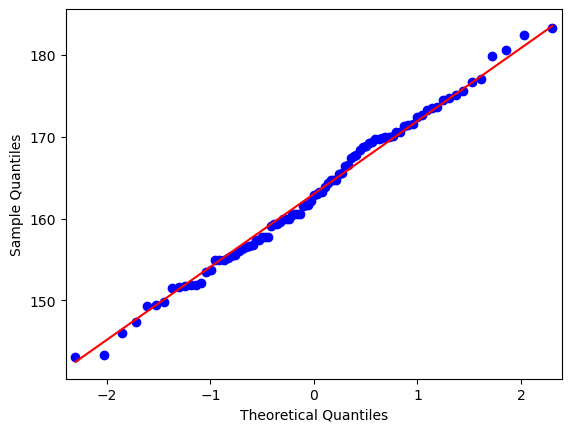

In [5]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations

qqplot(df['height'], line='s')
pyplot.show()

In [10]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(df['height'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.990, p=0.706
Sample looks Gaussian (fail to reject H0)


In [11]:
X = df[['FA','age','sex']].values.reshape(-1,3)
y = df['height'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=42)
sample_size = len(X_train)
independent_variables = 1
#training the model
model = linear_model.LinearRegression(normalize=True)
model.fit(X_train, y_train)
fit = model.predict(X_train)
print(model.coef_,model.intercept_)

#plt.scatter(X.values.reshape(-1,1), y.values.reshape(-1,1))
#plt.plot(X.values.reshape(-1,1), fit, c='r')
#plt.show()
r2 = sklearn.metrics.r2_score(y_train, fit)
r2 = adjusted_r2(r2,sample_size,independent_variables)
print("Train Adj. R2 = ",r2)

#Test model
fit = model.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, fit)
r2 = adjusted_r2(r2,sample_size,independent_variables)
print("Test Adj. R2 = ",r2)

[[ 3.70497462  0.23051728 -3.40404576]] [59.03904782]
Train Adj. R2 =  0.8454548009090248
Test Adj. R2 =  0.9048135231001142


In [27]:
from statsmodels.datasets.longley import load_pandas
import statsmodels as sm
y = load_pandas().endog
X = load_pandas().exog
X = sm.tools.tools.add_constant(X)

D:\Personal\Online_learning\Udemy\MachineLearning\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
X_train, X_test, y_train, y_test = tts(df[['FA','F','P','age','sex']], df['height'], test_size=0.20, random_state=42)
X_train = sm.tools.tools.add_constant(X_train)

In [30]:
ols_model = sm.regression.linear_model.OLS(y_train, X_train)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     84.37
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           8.83e-28
Time:                        01:06:34   Log-Likelihood:                -190.63
No. Observations:                  74   AIC:                             393.3
Df Residuals:                      68   BIC:                             407.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.9242     10.038      5.173      0.0

In [31]:
data = pd.read_csv('data.csv')
data = data[(data['race']!=1)&(data['F']<70)] # outlier
data

,sex,height,FA,P,F,age,district,race
9,0,180.2,30.5,19.6,27.2,21,N/eliya,2
12,0,170.1,28.6,19.2,26.7,21,jaffna,2
45,0,169.1,27.8,18.1,25.4,22,colombo,4
52,0,173.9,28.3,18.8,25.4,23,batticalo,2
53,0,170.7,28.3,18.7,25.6,23,colombo,2
64,1,145.9,23.8,16.3,21.5,21,colombo,2
69,1,163.6,26.9,17.9,24.3,23,gampaha,4
91,1,161.7,25.4,17.4,24.0,22,gampaha,3
102,1,153.6,24.7,17.2,21.6,27,jaffna,2


In [32]:
#evaluate model
#Test model
fit = model.predict(data[['FA','age','sex']])
r2 = sklearn.metrics.r2_score(data['height'], fit)
r2 = adjusted_r2(r2,sample_size,independent_variables)
print("Test Adj. R2 = ",r2)
print(sklearn.metrics.mean_squared_error(data['height'], fit))

Test Adj. R2 =  0.8822396470718294
11.506000228422131


In [33]:
actual = data['height']
estimate = fit
d = pd.DataFrame()
d['actual'] = actual
d['estimate'] = estimate
d['age'] = data['age']
d['sex'] = data['sex']
d

,actual,estimate,age,sex
9,180.2,176.881637,21,0
12,170.1,169.842185,21,0
45,169.1,167.108723,22,0
52,173.9,169.191727,23,0
53,170.7,169.191727,23,0
64,145.9,148.654261,21,1
69,163.6,160.600717,23,1
91,161.7,154.812738,22,1
102,153.6,153.371842,27,1


In [ ]:
#### following is only try to test forward selection

In [34]:
import statsmodels.formula.api as smf

'''https://planspace.org/20150423-forward_selection_with_statsmodels/'''

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [35]:
X_train, X_test, y_train, y_test = tts(df[['FA','F','P','sex','age','height']], df['height'], test_size=0.20, random_state=42)

In [36]:
model = forward_selected(X_train, 'height')
print(model.model.formula)
print(model.rsquared_adj)

height ~ FA + F + sex + 1
0.8535926134256436


In [37]:
fit = model.predict(X_test[['FA','F','P','sex','age']])
sklearn.metrics.r2_score(y_test, fit)

0.922007667159963

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           9.00e-30
Time:                        01:07:06   Log-Likelihood:                -191.05
No. Observations:                  74   AIC:                             390.1
Df Residuals:                      70   BIC:                             399.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3410      8.583      6.564      0.000      39.222      73.460
FA             2.9136      0.418      6.976      0.000       2.081       3.747
F              1.1848      0.450      2.631      0.010       0.287       2.083
sex           -2.7107      1.048     -2.587      0.012      -4.801      -0.621
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.508
Skew:                          -0.142   Prob(JB):                        0.776
Kurtosis:                       2.710   Cond. No.                         822.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
data = data[(data['race']!=1)&(data['F']<70)]
data

,sex,height,FA,P,F,age,district,race
9,0,180.2,30.5,19.6,27.2,21,N/eliya,2
12,0,170.1,28.6,19.2,26.7,21,jaffna,2
45,0,169.1,27.8,18.1,25.4,22,colombo,4
52,0,173.9,28.3,18.8,25.4,23,batticalo,2
53,0,170.7,28.3,18.7,25.6,23,colombo,2
64,1,145.9,23.8,16.3,21.5,21,colombo,2
69,1,163.6,26.9,17.9,24.3,23,gampaha,4
91,1,161.7,25.4,17.4,24.0,22,gampaha,3
102,1,153.6,24.7,17.2,21.6,27,jaffna,2


In [40]:
fit = model.predict(data[['FA','F','P','sex','age']])
print(sklearn.metrics.r2_score(data['height'], fit))
print(sklearn.metrics.mean_squared_error(data['height'], fit))

0.8976049169742414
10.143661448316431


In [41]:
actual = data['height']
estimate = fit
d = pd.DataFrame()
d['actual'] = actual
d['estimate'] = round(estimate,1)
d

,actual,estimate
9,180.2,177.4
12,170.1,171.3
45,169.1,167.4
52,173.9,168.9
53,170.7,169.1
64,145.9,148.4
69,163.6,160.8
91,161.7,156.1
102,153.6,151.2
